#### Задание исследовать функции:
1. f = -18 * x ** 3 + 5 * x ** 2 + 10 * x - 30
2. f = 2 * x ** 3 + 2 * x ** 2 - 18 * x - 18
3. f = (x ** 2 + 3) / (3 * (x + 1))

Исследуем 3ю функцию:
f = (x ** 2 + 3) / (3 * (x + 1))

In [1]:
from sympy import *
from sympy.plotting import plot
init_printing

<function sympy.interactive.printing.init_printing(pretty_print=True, order=None, use_unicode=None, use_latex=None, wrap_line=None, num_columns=None, no_global=False, ip=None, euler=False, forecolor=None, backcolor='Transparent', fontsize='10pt', latex_mode='plain', print_builtin=True, str_printer=None, pretty_printer=None, latex_printer=None, scale=1.0, **settings)>

In [2]:
x=Symbol('x')
f = (x ** 2 + 3) / (3 * (x + 1))

Построим график

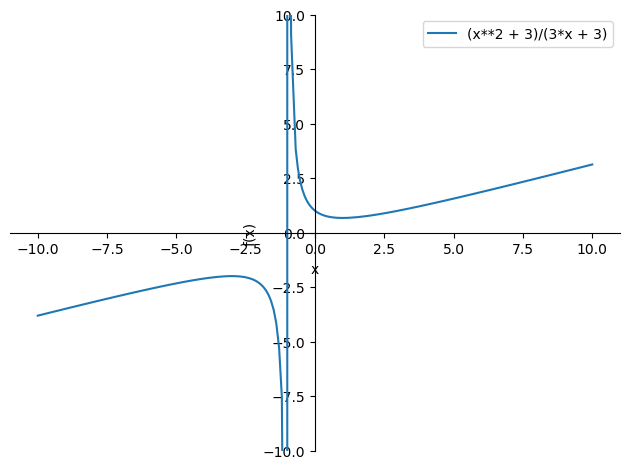

In [43]:
plot(f, legend=True, ylim=(-10,10))

Область определения функции

In [22]:
Reals - singularities(f, x) 

Union(Interval.open(-oo, -1), Interval.open(-1, oo))

Определим корни или нули функции

In [10]:
solveset(f,x,domain=S.Reals)

EmptySet

In [29]:
print(f'Точка пересечения с осью y (x=0) f={f.subs(x,0)}')

Точка пересечения с осью y (x=0) f=1


Проверяем являются ли найденные точки ассимптотами

In [33]:
limit(f,x,-1,'+-')

zoo

подтверждаем вертикальную ассимптоту x=-1

In [42]:
k=limit(f/x,x,oo)
b=limit(f-k*x,x,oo)

print(f'k={k},b={b} ')
print('у нас еще есть диагональная ассимптота y=(x-1)/3')

k=1/3,b=-1/3 
у нас еще есть диагональная ассимптота y=(x-1)/3


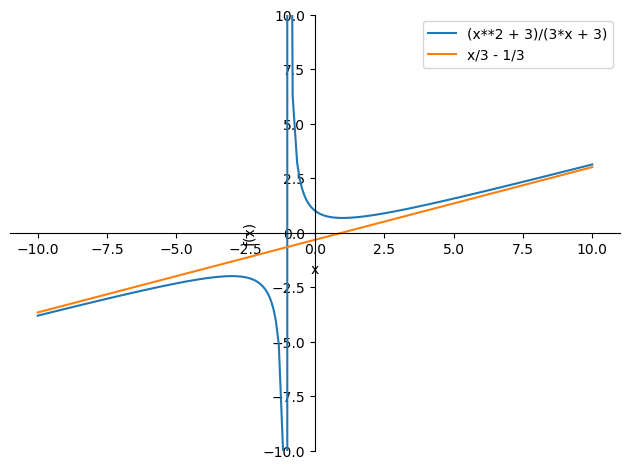

In [44]:
y=(x-1)/3
plot(f,y,legend=True, ylim=(-10,10))

Найдем интервалы, на которых функция возрастает и убывает

In [50]:
f_diff1 = [-oo,-1, oo]
f_diff1[1:1] = solve(diff(f), x)
f_diff=sorted(f_diff1)
incr_list = []
decr_list = []

for i in range(1, len(f_diff)):
    val = is_decreasing(f, Interval.open(f_diff[i - 1], f_diff[i]))
    if val:
        decr_list.append(f"[{f_diff[i - 1]}, {f_diff[i]}]")
    else:
        incr_list.append(f"[{f_diff[i - 1]}, {f_diff[i]}]")
        
print(f"Возрастает на интервалах:", *incr_list, sep="\n")
print(f"Убывает на интервалах:", *decr_list, sep="\n")


Возрастает на интервалах:
[-oo, -3]
[1, oo]
Убывает на интервалах:
[-3, -1]
[-1, 1]


Вычислим вершину (экстремумы функции)

In [82]:
df=solve(diff(f),x)
b= [-oo,-1,oo]
b[1:1]=solve(diff(f),x)
c=sorted(b)
# print(df)
# print(c)
for j in df:
    for i in range(1, len(f_diff)-1):
        if i==c.index(j):
            val1 = is_increasing(f, Interval.open(c[i - 1], c[i]))
            val2 = is_decreasing(f, Interval.open(c[i], c[i+1]))
#             print(j,i,val1,val2)
            if val1==val2==True:
                print(f"Точка локального максимума: x: {j}, y: {f.subs(x,j)}")
            elif val1==val2==False:
                print(f"Точка локального минимума: x: {j}, y: {f.subs(x,j)}")
            else:
                print(f"непонятно: x: {j}, y: {f.subs(x,j)}")


Точка локального максимума: x: -3, y: -2
Точка локального минимума: x: 1, y: 2/3


Определим промежутки знакопостоянства функции

In [86]:
print(f'f>0: {solve(f-y>0,x)}')
print(f'f<0: {solve(f-y<0,x)}')

f>0: (-1 < x) & (x < oo)
f<0: (-oo < x) & (x < -1)
